## **09. Representasi Pengetahuan (Knowledge Representation)**

---


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data_testing = pd.read_csv('data_testing.csv')

data_testing


,full_text,topic_cluster,emotion
0,@shxxars131 @clordtod @gatauahdark @idextratim...,0,Anger
1,@kyentut Kasian timnas,0,Sad
2,memang euro sebaiknya dukung timnas pusat ajah...,0,Neutral
3,Pelatih Filipina Tom Saintfiet: ️ Level Timnas...,0,Neutral
4,Timnas Indonesia dipuji habis oleh pelatih Fil...,0,Joy
...,...,...,...
1996,Kalo karena fomo perempuan demand nonton timna...,9,Anger
1997,Gue against orang2 yang anti dengan masuknya s...,9,Anger
1998,@NoAbsen13 @MurdiYasin @idextratime @bliblidot...,9,Neutral
1999,Btw tl aku isinya bukan lagi nct tapi nathan t...,9,Anger


In [17]:
topic_interpretation = pd.read_csv('topic_interpretation.csv')
topic_interpretation

,number_of_topic,text
0,0,Sejarah yang dicetak oleh Timnas Indonesia dal...
1,1,Shin Tae-yong pelatih untuk timnas
2,2,Timnas Indonesia lolos kualifikasi Piala Dunia
3,3,Supporter datang ke hotel timnas
4,4,Reaksi supporter ke Tom Haye saat pertandingan
5,5,Orang-orang yang fomo saat menonton timnas
6,6,Penampilan Anang dan Asyanti di penutupan pert...
7,7,Timnas day di GBK stadion
8,9,Cegil fomo fans Timnas Indonesia
9,8,Performa Timnas U-23 Indonesia dan performa im...


In [18]:
merged_df = data_testing.merge(topic_interpretation, left_on='topic_cluster', right_on='number_of_topic', how='left')

merged_df

,full_text,topic_cluster,emotion,number_of_topic,text
0,@shxxars131 @clordtod @gatauahdark @idextratim...,0,Anger,0,Sejarah yang dicetak oleh Timnas Indonesia dal...
1,@kyentut Kasian timnas,0,Sad,0,Sejarah yang dicetak oleh Timnas Indonesia dal...
2,memang euro sebaiknya dukung timnas pusat ajah...,0,Neutral,0,Sejarah yang dicetak oleh Timnas Indonesia dal...
3,Pelatih Filipina Tom Saintfiet: ️ Level Timnas...,0,Neutral,0,Sejarah yang dicetak oleh Timnas Indonesia dal...
4,Timnas Indonesia dipuji habis oleh pelatih Fil...,0,Joy,0,Sejarah yang dicetak oleh Timnas Indonesia dal...
...,...,...,...,...,...
1996,Kalo karena fomo perempuan demand nonton timna...,9,Anger,9,Cegil fomo fans Timnas Indonesia
1997,Gue against orang2 yang anti dengan masuknya s...,9,Anger,9,Cegil fomo fans Timnas Indonesia
1998,@NoAbsen13 @MurdiYasin @idextratime @bliblidot...,9,Neutral,9,Cegil fomo fans Timnas Indonesia
1999,Btw tl aku isinya bukan lagi nct tapi nathan t...,9,Anger,9,Cegil fomo fans Timnas Indonesia


## Knowledge

### Per-Topic

In [19]:
topic_cluster_0_df = merged_df[merged_df['topic_cluster'] == 6]

topic_cluster_0_df

,full_text,topic_cluster,emotion,number_of_topic,text
53,@Indostransfer Bayangin aja timnas bisa away k...,6,Anger,6,Penampilan Anang dan Asyanti di penutupan pert...
184,@MurtadhaOne bkn penggemar bola sekedar ikut e...,6,Anger,6,Penampilan Anang dan Asyanti di penutupan pert...
286,KALO LC-NYA GINI MIMIN SIH MAU . #FYP #indones...,6,Anger,6,Penampilan Anang dan Asyanti di penutupan pert...
670,Anang Hermansyah Disebut Walk Out Setelah Diso...,6,Anger,6,Penampilan Anang dan Asyanti di penutupan pert...
718,@choymarkochoy @ananghijau Ancene Anang gak je...,6,Anger,6,Penampilan Anang dan Asyanti di penutupan pert...
...,...,...,...,...,...
1376,@ndristic @xavierr477 @idextratime @bliblidotc...,6,Anger,6,Penampilan Anang dan Asyanti di penutupan pert...
1377,Alhamdulillah bangun tidur jam segini jadi ga ...,6,Joy,6,Penampilan Anang dan Asyanti di penutupan pert...
1378,@idextratime takut banget ada zombie semoga ti...,6,Fear,6,Penampilan Anang dan Asyanti di penutupan pert...
1379,geli bgt dah sama orang yg nungguin pemain tim...,6,Anger,6,Penampilan Anang dan Asyanti di penutupan pert...


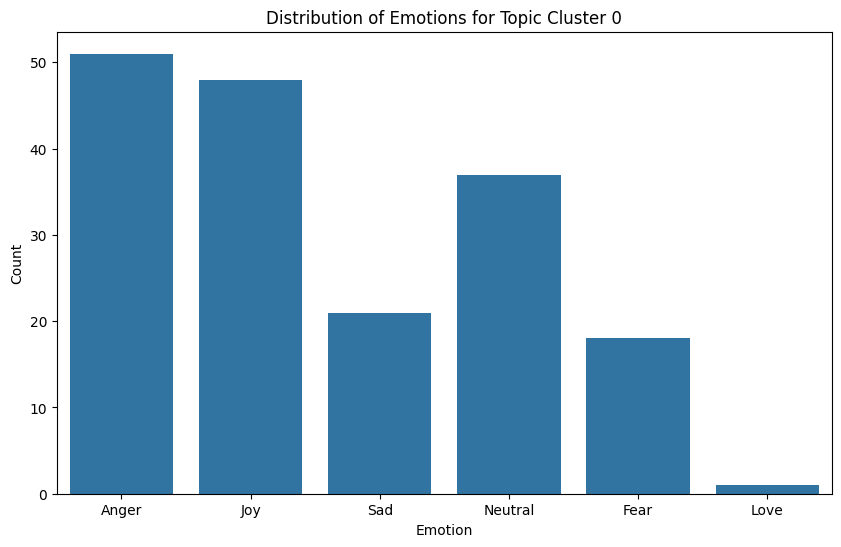

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=topic_cluster_0_df, x='emotion')

plt.title('Distribution of Emotions for Topic Cluster 0')
plt.xlabel('Emotion')
plt.ylabel('Count')

plt.show()

In [21]:
most_frequent_emotion = topic_cluster_0_df['emotion'].mode()[0]


print(f'Label emosi yang paling sering muncul dalam topic_cluster 0 adalah "{most_frequent_emotion}".')

emotion_df = topic_cluster_0_df[topic_cluster_0_df['emotion'] == most_frequent_emotion]

emotion_df

Label emosi yang paling sering muncul dalam topic_cluster 0 adalah "Anger".


,full_text,topic_cluster,emotion,number_of_topic,text
53,@Indostransfer Bayangin aja timnas bisa away k...,6,Anger,6,Penampilan Anang dan Asyanti di penutupan pert...
184,@MurtadhaOne bkn penggemar bola sekedar ikut e...,6,Anger,6,Penampilan Anang dan Asyanti di penutupan pert...
286,KALO LC-NYA GINI MIMIN SIH MAU . #FYP #indones...,6,Anger,6,Penampilan Anang dan Asyanti di penutupan pert...
670,Anang Hermansyah Disebut Walk Out Setelah Diso...,6,Anger,6,Penampilan Anang dan Asyanti di penutupan pert...
718,@choymarkochoy @ananghijau Ancene Anang gak je...,6,Anger,6,Penampilan Anang dan Asyanti di penutupan pert...
735,@GIBOLofficial Ini anang yang dulu main di Per...,6,Anger,6,Penampilan Anang dan Asyanti di penutupan pert...
740,@adnardn Gw jg mikir gitu ini yg ngundang anan...,6,Anger,6,Penampilan Anang dan Asyanti di penutupan pert...
793,@aripdarmawannn Legend Timnas Anang Ma ruf,6,Anger,6,Penampilan Anang dan Asyanti di penutupan pert...
806,ga mungkin kan yaa harga tiket nonton timnas n...,6,Anger,6,Penampilan Anang dan Asyanti di penutupan pert...
834,Yaudalah namanya juga penyanyi mungkin salah a...,6,Anger,6,Penampilan Anang dan Asyanti di penutupan pert...


# Konten Tentang Timnas Indonesia di Vidio


Contoh :

## 1. Sejarah yang dicetak oleh Timnas Indonesia dalam pertandingan melawan Filipina di kualifikasi Piala Dunia (Netral)
**Konten Netral**: Video rekapitulasi pertandingan yang menyoroti momen-momen penting tanpa fokus pada emosi tertentu. Profil pemain dan statistik pertandingan dapat ditampilkan.

**Contoh Tweet**:
> Saksikan rekapitulasi pertandingan Timnas Indonesia melawan Filipina di kualifikasi Piala Dunia! Lihat statistik dan momen-momen penting di sini. 📊⚽ [link video]

## 2. Shin Tae-yong pelatih untuk timnas (Joy)
**Konten Senang**: Video yang menyoroti keberhasilan Shin Tae-yong dalam melatih Timnas Indonesia, termasuk cuplikan dari wawancara yang menunjukkan antusiasme dan strategi yang membawa kemenangan.

**Contoh Tweet**:
> Lihat bagaimana Shin Tae-yong membawa Timnas Indonesia ke puncak! 🎉 Wawancara eksklusif dan momen-momen kemenangan ada di sini. 💪🇮🇩 [link video]

## 3. Timnas Indonesia lolos kualifikasi Piala Dunia (Joy)
**Konten Senang**: Cuplikan video momen-momen gol dan sorak-sorai dari para pemain serta fans. Kutipan inspiratif dari pelatih dan pemain tentang perjalanan mereka menuju kualifikasi.

**Contoh Tweet**:
> Timnas Indonesia berhasil lolos ke kualifikasi Piala Dunia! 🎊 Saksikan momen-momen terbaik dan kegembiraan para pemain dan fans! #TimnasLolos [link video]

## 4. Supporter datang ke hotel timnas (Fear)
**Konten Takut**: Video yang menunjukkan suasana tegang saat para supporter berkumpul di hotel timnas. Menyoroti pentingnya keamanan dan respons dari pihak keamanan.

**Contoh Tweet**:
> Supporter Timnas berkumpul di hotel timnas, menciptakan suasana tegang. Lihat bagaimana tim dan pihak keamanan menangani situasi ini. #Timnas #Supporter [link video]

## 5. Reaksi supporter ke Tom Haye dan Struick saat pertandingan (Love)
**Konten Cinta**: Video reaksi supporter yang menunjukkan dukungan dan kasih sayang mereka kepada Tom Haye. Testimoni dari fans tentang kecintaan mereka pada pemain dan tim.

**Contoh Tweet**:
> Dukungan luar biasa dari supporter untuk Tom Haye dan Struick! ❤️ Saksikan reaksi dan testimoni mereka tentang kecintaan pada Timnas Indonesia. #LoveForHaye [link video]

## 6. Orang-orang yang fomo saat menonton timnas (Sad)
**Konten Sedih**: Cerita atau video tentang pengalaman orang-orang yang tidak bisa menonton langsung pertandingan timnas, menunjukkan kerinduan mereka untuk bisa mendukung tim secara langsung.

**Contoh Tweet**:
> Banyak yang merasa FOMO karena tidak bisa menonton langsung Timnas. 😢 Simak cerita mereka dan dukung Timnas dari rumah! #FOMOTimnas [link video]

## 7. Penampilan Anang dan Asyanti di penutupan pertandingan (Anger)
**Konten Marah**: Video atau artikel yang mendiskusikan reaksi kontroversial terhadap penampilan Anang dan Asyanti, termasuk pendapat dari berbagai pihak tentang apakah penampilan tersebut sesuai atau tidak.

**Contoh Tweet**:
> Penampilan Anang dan Asyanti di penutupan pertandingan menimbulkan kontroversi. Apa pendapat kalian? #KontroversiTimnas [link video]

## 8. Timnas day di GBK stadion (Netral)
**Konten Netral**: Dokumentasi hari pertandingan di GBK stadion, menyoroti suasana sebelum, selama, dan setelah pertandingan. Termasuk wawancara dengan fans dan staf stadion.

**Contoh Tweet**:
> Hari pertandingan Timnas di GBK! Lihat dokumentasi lengkap dari suasana stadion hingga wawancara dengan fans dan staf. #TimnasDay [link video]

## 9. Cegil fomo fans Timnas Indonesia (Anger)
**Konten Marah**: Diskusi atau video tentang frustrasi dan rasa marah fans yang tidak bisa mendapatkan tiket atau akses untuk menonton pertandingan timnas karena cegil.

**Contoh Tweet**:
> Banyak fans yang frustrasi karena tidak bisa mendapatkan tiket untuk nonton Timnas karena fenomena cegil fans fomo. Bagaimana menurut kalian terkait hal tersebut? #FOMOTimnas [link video]

## 10. Performa Timnas U-23 Indonesia dan performa impresif mereka di pertandingan (Joy)
**Konten Senang**: Highlight video dari pertandingan Timnas U-23 yang menunjukkan momen-momen penting dan impresif, wawancara dengan pemain muda yang berbicara tentang aspirasi dan harapan mereka.

**Contoh Tweet**:
> Timnas U-23 tampil impresif! 🎉 Saksikan highlight dan wawancara eksklusif dengan para pemain muda berbakat. #TimnasU23 [link video]
